In [1]:
import pandas as pd
from common_codes.utils import Utils

In [2]:
test_data = pd.read_csv(Utils.get_file_path('titanic_test.csv'))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data = pd.read_csv(Utils.get_file_path('titanic_train.csv'))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


<Axes: xlabel='Pclass', ylabel='Survived'>

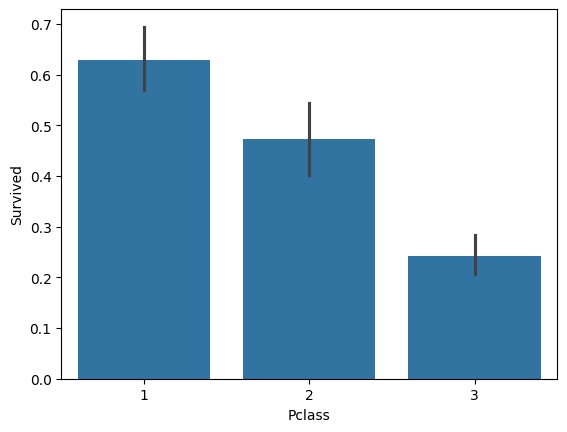

In [6]:
import seaborn as sns

sns.barplot(x='Pclass', y='Survived', data=train_data)

<Axes: xlabel='Sex', ylabel='Survived'>

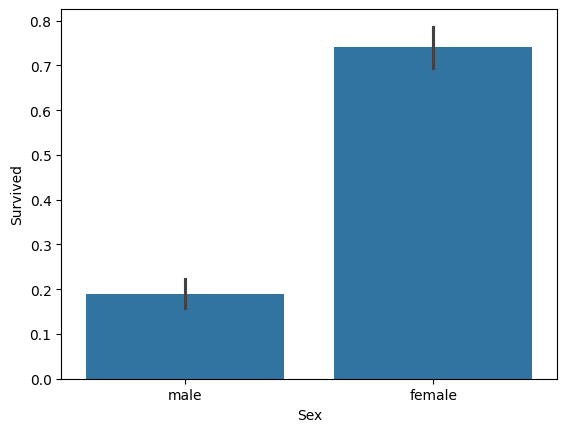

In [7]:
sns.barplot(x='Sex', y='Survived', data=train_data)

<Axes: xlabel='SibSp', ylabel='Survived'>

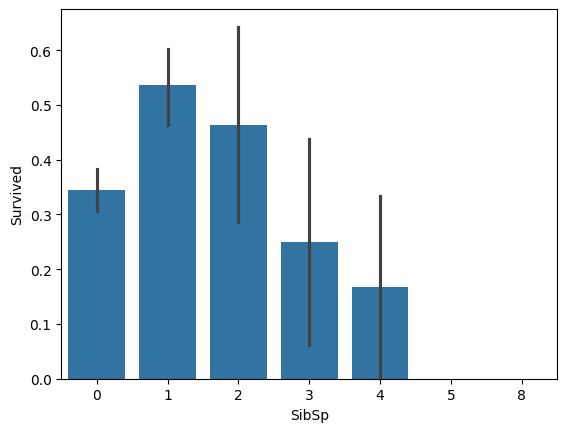

In [8]:
sns.barplot(x='SibSp', y='Survived', data=train_data)

<Axes: xlabel='Parch', ylabel='Survived'>

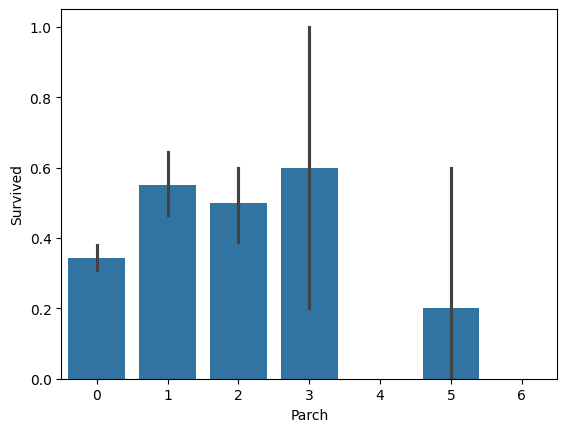

In [9]:
sns.barplot(x='Parch', y='Survived', data=train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

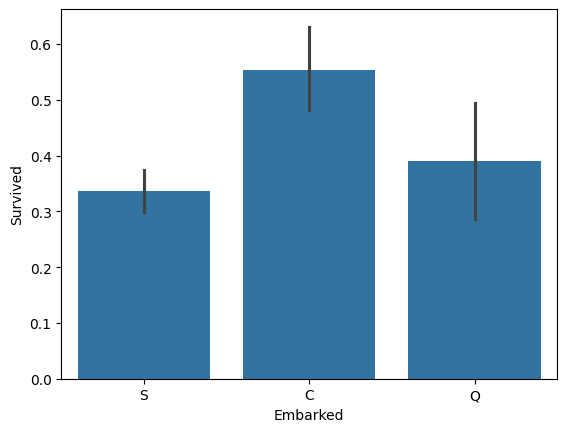

In [10]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

<Axes: xlabel='Fare', ylabel='Survived'>

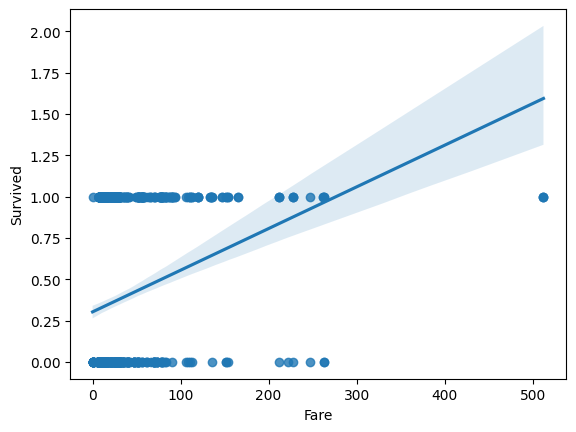

In [11]:
sns.regplot(x='Fare', y='Survived', data=train_data)

In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.fit_transform(test_data[['Age']])

In [14]:
# Fit and transform all columns at once
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])


In [15]:

from sklearn.preprocessing import LabelEncoder



encoder = LabelEncoder()
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])

test_data['Embarked'] = encoder.fit_transform(test_data['Embarked'])
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,NaN,2


In [16]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Embarked","Age"]
X = train_data[features]
X_test = test_data[features]

In [17]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked,Age
0,3,1,0,0,1,0.452723
1,3,0,1,0,2,0.617566
2,2,1,0,0,1,0.815377
3,3,1,0,0,2,0.353818
4,3,0,1,1,2,0.287881
...,...,...,...,...,...,...
413,3,1,0,0,2,0.396975
414,1,0,0,0,0,0.512066
415,3,1,0,0,2,0.505473
416,3,1,0,0,2,0.396975


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions_1 = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_1})
output.to_csv('submission_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X,y)
predictions_2 = knc.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_2})
output.to_csv('submission_2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(64, input_dim=6, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X, y, epochs=100, batch_size=5, validation_split=0.2, callbacks=[early_stopping])

predictions_3 = model.predict(X_test)
predictions_3 = [1 if i > 0.5 else 0 for i in predictions_3]

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_3})
output.to_csv('submission_3.csv', index=False)
print("Your submission was successfully saved!")

Epoch 1/100


/Users/murtuzasaifee/Documents/Personal/Codes/python_ml_nlp_practice/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5742 - loss: 0.7689 - val_accuracy: 0.8156 - val_loss: 0.5868
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6610 - loss: 0.6198 - val_accuracy: 0.7933 - val_loss: 0.5273
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6940 - loss: 0.6183 - val_accuracy: 0.7877 - val_loss: 0.4815
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6997 - loss: 0.5921 - val_accuracy: 0.8101 - val_loss: 0.4443
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7096 - loss: 0.5468 - val_accuracy: 0.8324 - val_loss: 0.4280
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7597 - loss: 0.5286 - val_accuracy: 0.8380 - val_loss: 0.4056
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7414 - loss: 0.5482 - val_accuracy: 0.8380 - val_loss: 0.4147
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7399 - loss: 0.5356 - val_ac

In [3]:
X

NameError: name 'X' is not defined